In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [107]:
url = "owid-covid-data.csv"

In [108]:
covid_df = pd.read_csv(url)

In [109]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [110]:
#convert date to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

#create column for month
covid_df['month'] = covid_df['date'].dt.month_name()

#Only use USA data for analysis
covidUS_df = covid_df[covid_df.location == 'United States']

#Only use 2021 data for the analysis
covidUS21_df = covidUS_df[(covidUS_df["date"] >= "2021-01-01") & (covidUS_df["date"] <= "2021-12-31")]

#covidUS_df[covidUS_df["date"].dt.year == 2020]
covidUS21_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month
152689,USA,North America,United States,2021-01-01,20365498.0,172382.0,206170.000,353948.0,2194.0,2614.000,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January
152690,USA,North America,United States,2021-01-02,20647872.0,282374.0,214084.429,356547.0,2599.0,2712.000,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January
152691,USA,North America,United States,2021-01-03,20851879.0,204007.0,223833.143,357984.0,1437.0,2711.857,...,24.6,NaN,2.77,78.86,0.926,472095.6,15.91,45.92,1418.066158,January
152692,USA,North America,United States,2021-01-04,21037385.0,185506.0,225535.143,359964.0,1980.0,2726.571,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January
152693,USA,North America,United States,2021-01-05,21267189.0,229804.0,229425.286,363568.0,3604.0,2724.857,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,January


In [113]:
#Caculate sum of total cases by month using groupby
covidUS21month_df = covidUS21_df.groupby(covid_df['date'].dt.month_name()).total_cases.sum()

#convert series to dataframe and reset index
covidUS21month_df = pd.DataFrame(covidUS21month_df)
covidUS21month_df.reset_index()

,date,total_cases
0,April,9.478092e+08
1,August,1.150807e+09
2,December,1.577856e+09
3,February,7.770093e+08
4,January,7.339211e+08
5,July,1.061501e+09
6,June,1.008013e+09
7,March,9.198288e+08
8,May,1.023564e+09
9,November,1.419698e+09


<IPython.core.display.Javascript object>


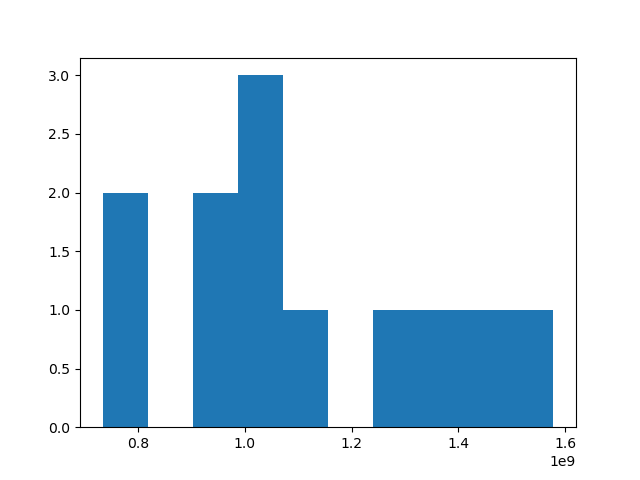

In [117]:
total_covid_cases = covidUS21month_df["total_cases"]
plt.hist(total_covid_cases)
plt.show()

<IPython.core.display.Javascript object>


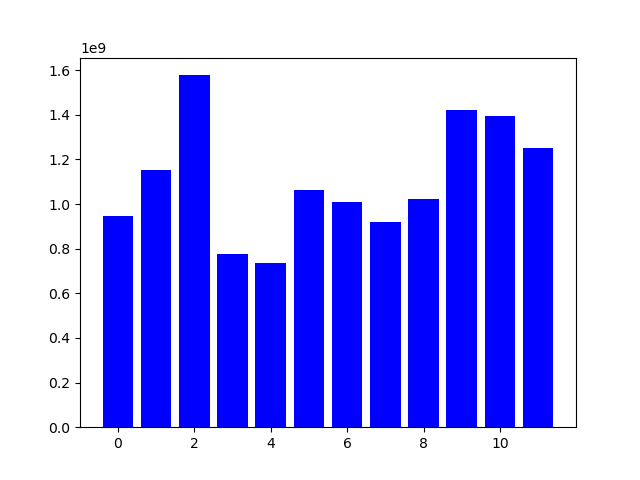

In [118]:
#plot bar chart
x_axis = np.arange(len(covidUS21month_df["total_cases"]))
y_values = covidUS21month_df["total_cases"]
plt.bar(x_axis, y_values, color="blue")
plt.show()